In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition

/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition"

In [ ]:
!kaggle datasets download -d itsahmad/indoor-scenes-cvpr-2019

In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet201
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09/Images/*')

In [ ]:
len(folders)

67

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:

DenseNet201 = tf.keras.applications.DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

74850304/74836368 [==============================] - 0s 0us/step


In [ ]:
# # don't train existing weights
for layer in DenseNet201.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(DenseNet201.output)

In [ ]:
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
# # x = Dropout(0.4)(x)
# # x = Dense(2048, activation='relu')(x)
# # x = BatchNormalization()(x)
# # x = Dense(512, activation='relu')(x)
# # x= Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=DenseNet201.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 12467 images belonging to 67 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3153 images belonging to 67 classes.


In [ ]:
# !pip install split-folders

In [ ]:
# import splitfolders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio("/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09/Images", output="/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09",
#     seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
390/390 [==============================] - 277s 697ms/step - loss: 0.4257 - accuracy: 0.8649 - val_loss: 1.1500 - val_accuracy: 0.7257
Epoch 2/20
390/390 [==============================] - 264s 677ms/step - loss: 0.4317 - accuracy: 0.8637 - val_loss: 1.1476 - val_accuracy: 0.7260
Epoch 3/20
390/390 [==============================] - 265s 680ms/step - loss: 0.4386 - accuracy: 0.8586 - val_loss: 1.1921 - val_accuracy: 0.7241
Epoch 4/20
390/390 [==============================] - 262s 672ms/step - loss: 0.4273 - accuracy: 0.8621 - val_loss: 1.2077 - val_accuracy: 0.7215
Epoch 5/20
 13/390 [>.............................] - ETA: 3:39 - loss: 0.4120 - accuracy: 0.8678

KeyboardInterrupt: ignored

In [ ]:
%cd /content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition

/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition


In [ ]:
model.save("DenseNet201_20_86.h5")

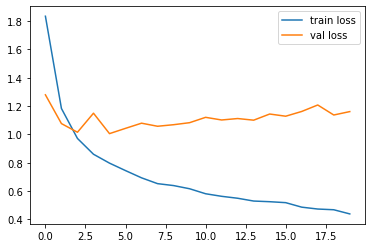

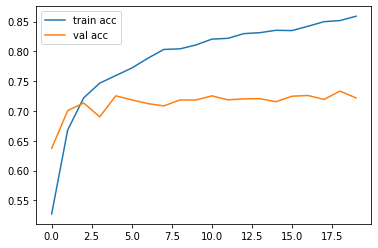

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[4.53342833e-02, 2.89961918e-07, 1.42724393e-03, ...,
        1.92465723e-06, 1.24491546e-02, 3.66716608e-06],
       [1.16125875e-06, 2.57007312e-04, 8.63687237e-05, ...,
        4.75139217e-07, 1.01521209e-06, 1.62973374e-04],
       [1.86513782e-09, 1.37989353e-09, 9.53220836e-10, ...,
        1.03585658e-13, 1.43679079e-12, 1.11039942e-08],
       ...,
       [2.30728332e-07, 5.35846675e-06, 2.10666690e-06, ...,
        3.14537303e-08, 9.41854353e-07, 8.41271958e-06],
       [8.01994950e-02, 5.22677283e-06, 1.09858711e-07, ...,
        4.06572234e-08, 8.81470623e-05, 3.16280313e-02],
       [2.38351331e-05, 1.04169645e-04, 1.81313069e-07, ...,
        4.44552377e-02, 2.08001993e-09, 5.42537578e-07]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([59, 22, 10, ..., 54, 34, 25])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/DenseNet201_20_86.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Computer Vision Projects/Indoor Scene Recognition/indoorCVPR_09/train/airport_inside/airport_inside_0001.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[212., 217., 220.],
        [212., 216., 219.],
        [171., 175., 174.],
        ...,
        [ 65.,  60., 116.],
        [122., 129.,  96.],
        [144., 148., 133.]],

       [[157., 169., 129.],
        [129., 141.,  93.],
        [124., 136.,  88.],
        ...,
        [152., 147., 201.],
        [104., 109.,  89.],
        [140., 143., 132.]],

       [[ 42.,  43.,  64.],
        [ 54.,  53.,  85.],
        [ 47.,  46.,  77.],
        ...,
        [249., 245., 255.],
        [ 83.,  80.,  97.],
        [131., 132., 137.]],

       ...,

       [[ 43.,  53.,  54.],
        [ 30.,  36.,  36.],
        [ 58.,  63.,  57.],
        ...,
        [112., 112., 114.],
        [ 60.,  63.,  68.],
        [ 49.,  52.,  59.]],

       [[ 74.,  79.,  85.],
        [ 87.,  87.,  95.],
        [103., 105., 104.],
        ...,
        [123., 121., 124.],
        [ 63.,  78.,  75.],
        [ 65.,  79.,  79.]],

       [[ 21.,  23.,  35.],
        [ 47.,  45.,  56.],
        [ 52.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[4.2748739e-04, 1.9566198e-04, 3.7920664e-04, 4.4906311e-04,
        4.4119172e-03, 9.0887910e-03, 4.5007821e-02, 1.4920093e-02,
        1.0024359e-05, 2.3757534e-03, 3.6958518e-05, 5.5322607e-06,
        2.4851508e-02, 3.5684831e-03, 5.5593746e-03, 8.4946478e-06,
        4.3028649e-05, 1.6662902e-04, 1.4195562e-04, 6.8083713e-03,
        8.3590872e-05, 2.4212504e-05, 2.1093583e-03, 8.3649410e-03,
        2.1138720e-04, 2.3111270e-05, 5.1113426e-07, 2.8190150e-05,
        1.7943930e-04, 1.1263388e-04, 4.7650246e-06, 2.2193082e-05,
        3.6155831e-04, 1.2189101e-05, 4.4148671e-03, 4.5085358e-04,
        2.4276792e-06, 2.0334506e-03, 1.4462220e-05, 1.9422193e-06,
        8.3363586e-05, 1.1164109e-03, 2.3329871e-04, 7.9344936e-05,
        4.1985400e-06, 1.8482820e-04, 7.7680373e-01, 2.4816515e-02,
        1.6117412e-05, 2.5204709e-04, 4.2772899e-05, 1.7581164e-04,
        4.1181729e-06, 1.8928925e-02, 8.1426576e-03, 1.3134634e-04,
        1.5202000e-04, 1.7545544e-05, 1.7792636e

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([46])